# Space titanic

> Aim: Explore the features of the [Space titanic](https://www.kaggle.com/competitions/spaceship-titanic) dataset. 

Performing some simple feature exploration on the variables inside our spaceship titanic dataset will help inform the feature engineering.

## Import packages

In [5]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics 

import seaborn as sns
sns.set_theme(style="darkgrid")

from spacetitanic.features.preprocess import tidy_cabin

## Load data

In [6]:
train = pd.read_csv("../data/raw/train.csv")
test = pd.read_csv("../data/raw/test.csv")

In [7]:
print(f'{train.shape}')
train

(8693, 14)


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [8]:
print(f'{test.shape}')
test

(4277, 13)


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


## Feature exploration

### Bind train and test together

Binding the train and test data together enables feature exploration with the greatest number of data points.

In [9]:
train["dataset"] = "train"
test["dataset"] = "test"

train_test = pd.concat([train, test])
train_test.reset_index(drop=True, inplace=True)

### Transported

**Definition:** Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

There is an even distribution of passengers who are transported as well as those who weren't. We have a balanced dataset, with similar number of positive and negative classes. This will be important when determining the metric for evaluating the performance of the classifier.

<AxesSubplot:xlabel='Transported', ylabel='count'>

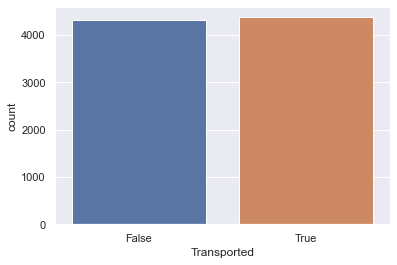

In [6]:
sns.countplot(x = "Transported", data = train_test)

#### HomePlanet

**Definition:**  The planet the passenger departed from, typically their planet of permanent residence.

In [7]:
print("Missing values:")
print(train_test["HomePlanet"].isnull().sum())

Missing values:
288


The majority of passengers originate from Earth. My first thought is whether this impacts their wealth (e.g. assuming Mars-based colonies are only reachable by the rich), though it's unclear how this would affect their probability of being transported.

<AxesSubplot:xlabel='HomePlanet', ylabel='count'>

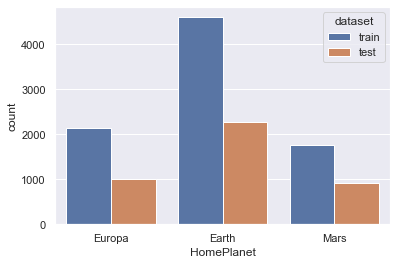

In [8]:
sns.countplot(x = "HomePlanet", hue = "dataset", data = train_test)

Looking at the count, both Earth and Europa look to be informative for determining a passenger's probability of being transported.

### 

<AxesSubplot:xlabel='HomePlanet', ylabel='count'>

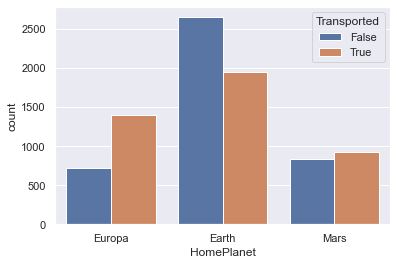

In [9]:
sns.countplot(x = "HomePlanet", hue = "Transported", data = train_test)

### CryoSleep

**Definition:**  Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.

In [14]:
print("Missing values:")
print(train_test["CryoSleep"].isnull().sum())

Missing values:
310


Cryosleep looks to differentiate between transported passengers well. Those that were in cryosleep (and therefore stuck inside their cabins), were transported more frequently.

<AxesSubplot:xlabel='CryoSleep', ylabel='count'>

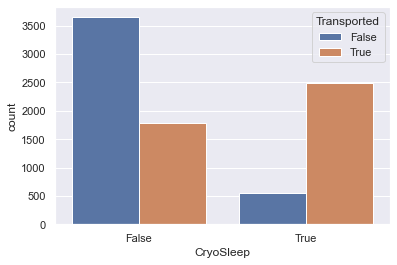

In [11]:
sns.countplot(x = "CryoSleep", hue = "Transported", data = train_test)

### Cabin

**Definition:**  The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.

In [12]:
print("Missing values:")
print(train_test["Cabin"].isnull().sum())

Missing values:
299


To give predictive value, we should split the cabins into separate deck, num and side attributes. In particular, whether the passender is on the port/starboard side, depending of the orientation of the ship as it collided with the anomaly, may be informative.

In [13]:
train_test["Cabin"].value_counts()

G/734/S     8
G/160/P     8
D/176/S     7
G/1476/S    7
B/201/P     7
           ..
E/317/P     1
F/1039/P    1
F/1038/P    1
C/158/P     1
G/1498/S    1
Name: Cabin, Length: 9825, dtype: int64

In [11]:
train_test = tidy_cabin(train_test)

In [15]:
# double check we have the same number of missing values as Cabin
print("Missing values:")
print(train_test["deck"].isnull().sum())

Missing values:
299


Some deck values (e.g. B, C) look to have distinguish well between transported passengers. The cabin number has no/little differentiating effect. There is a small difference observed in transport depending on the side of the passenger. 

<AxesSubplot:xlabel='deck', ylabel='count'>

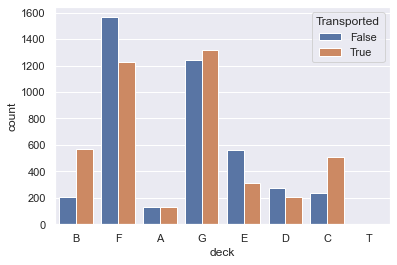

In [16]:
sns.countplot(x = "deck", hue = "Transported", data = train_test)

<AxesSubplot:xlabel='Transported', ylabel='cabin_num'>

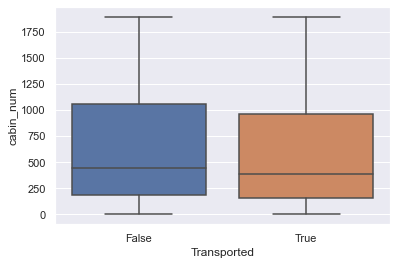

In [24]:
sns.boxplot(x = "Transported", y = "cabin_num", data = train_test)

<AxesSubplot:xlabel='side', ylabel='count'>

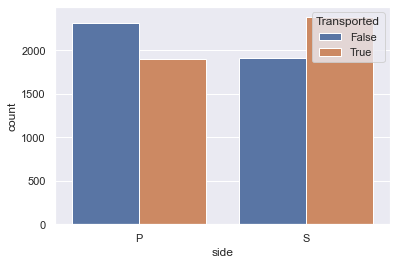

In [17]:
sns.countplot(x = "side", hue = "Transported", data = train_test)

### Destination

**Definition:**  The planet the passenger will be debarking to.

In [26]:
print("Missing values:")
print(train_test["Destination"].isnull().sum())

Missing values:
274


The destination of the passengers looks to have some impact on their probability of being transported. It's worth noting that there's a relationship (as expected) between the home planet and the destination of the passengers.

<AxesSubplot:xlabel='Destination', ylabel='count'>

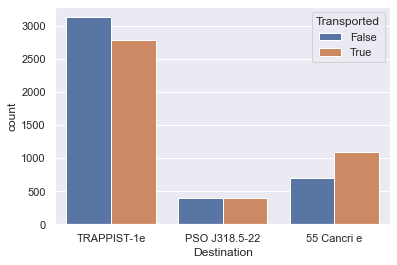

In [28]:
sns.countplot(x = "Destination", hue = "Transported", data = train_test)

<AxesSubplot:xlabel='Destination', ylabel='count'>

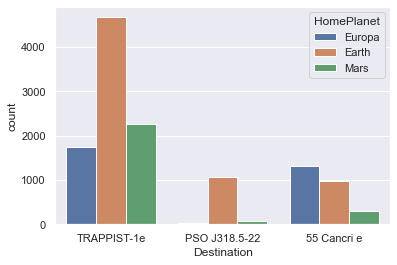

In [30]:
sns.countplot(x = "Destination", hue = "HomePlanet", data = train_test)

### Age

**Definition:** The age of the passenger.

In [34]:
print("Missing values:")
print(train_test["Age"].isnull().sum())

Missing values:
270


There's a slightly greater chance that younger passengers will be transported.

<AxesSubplot:xlabel='Transported', ylabel='Age'>

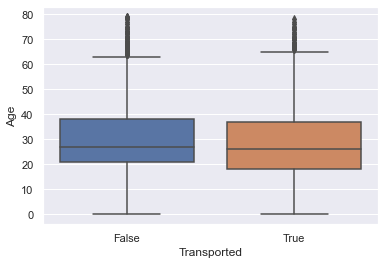

In [35]:
sns.boxplot(x = "Transported", y = "Age", data = train_test)

Looking at the distribution, the shift in younger folk being more likely to be transported looks to be driven by/most prominent teens/children (<= 20 years old). 

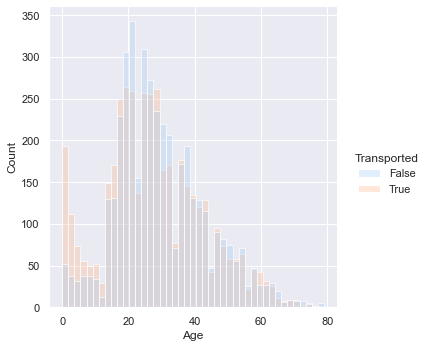

In [45]:
sns.displot(x = "Age", hue = "Transported", alpha = 0.3, palette = "pastel", data = train_test)

### VIP

**Definition:** Whether the passenger has paid for special VIP service during the voyage.

In [47]:
print("Missing values:")
print(train_test["VIP"].isnull().sum())

Missing values:
296


VIP status looks to have very little impact on the probability of a passenger being transported.

<AxesSubplot:xlabel='VIP', ylabel='count'>

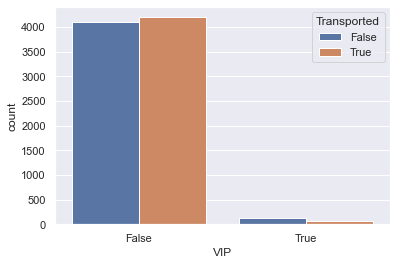

In [50]:
sns.countplot(x = "VIP", hue = "Transported", data = train_test)

### RoomService, FoodCourt, ShoppingMall, Spa, VRDeck

**Definition:** Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.

In [52]:
cols_of_interest = ["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]

for col in cols_of_interest:
    print("Missing values (", col, "):")
    print(train_test[col].isnull().sum()) 


Missing values ( RoomService ):
263
Missing values ( FoodCourt ):
289
Missing values ( ShoppingMall ):
306
Missing values ( Spa ):
284
Missing values ( VRDeck ):
268


By zooming in on the boxplots to, we can see that, on average, those who spend less on luxury items (poorer) are more likely to be transported.

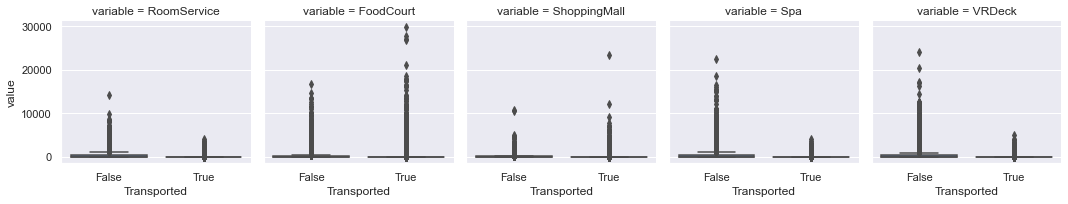

In [73]:
luxury_long = pd.melt(
    train_test[cols_of_interest + ["Transported"]], 
    id_vars = "Transported", 
    value_vars = cols_of_interest
)

g = sns.FacetGrid(luxury_long, col="variable")
g.map_dataframe(sns.boxplot, x="Transported", y="value")


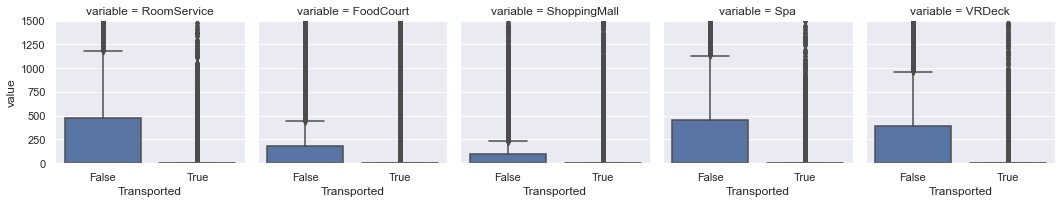

In [80]:
g = sns.FacetGrid(luxury_long, col="variable")
g.map_dataframe(sns.boxplot, x="Transported", y="value")
g.set(ylim=(0, 1500))

Although there is some correlation between the luxury product expenditures, the correlation coefficients are not as high as I suspected them to be.

<AxesSubplot:>

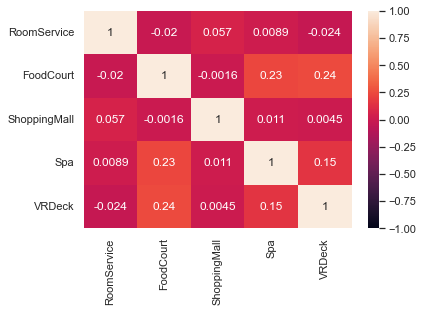

In [84]:
sns.heatmap(train_test[cols_of_interest].corr(), vmin=-1, vmax=1, annot=True)

### Convert categorical to numeric

In [ ]:
le = preprocessing.LabelEncoder()

for feature in feature_cols:
    if train_test[feature].dtype == object:
        le = le.fit(train_test[feature])
        train_test[feature] = le.transform(train_test[feature])

### Split train and test back

In [ ]:
train = train_test[train_test["dataset"] == "train"].copy()
test = train_test[train_test["dataset"] == "test"].copy()

for data in [train, test]:
    data.reset_index(drop=True, inplace=True)
    data.drop(columns="dataset", inplace=True)

## Train model

### Split into train and test

In [ ]:
X = train[feature_cols].copy()

y = train["Transported"].copy()
le = le.fit(y)
y = le.transform(y)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=32)

### Fit a random forest

In [ ]:
clf = RandomForestClassifier(n_estimators = 100)
clf.fit(X_train, y_train)

## Evaluate model

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
print(f"Accuracy: {metrics.accuracy_score(y_test, y_pred)}")
print(f"Accuracy: {metrics.f1_score(y_test, y_pred)}")
print(f"Accuracy: {metrics.precision_score(y_test, y_pred)}")
print(f"Accuracy: {metrics.recall_score(y_test, y_pred)}")